#Projeto 4 - Recomendação de vinhos - Wine Reviews

**Entrega**

O projeto deve ser entregue até o domingo da 5ª semana de aula, envie o link do GitHub ou HTML na atividade no Moodle.

O prazo máximo é segunda-feira da 5ª semana de aula, valendo 20% a menos da nota.

**Dados do Certificado**

Linguagem: Python

Tecnologias: Pandas, Numpy, RegEx, Matplotlib e Sklearn

Carga horária: 12 horas

**Wine Reviews - Kaggle**
O conjunto de dados Wine Reviews possui o comentário e a nota dada por cada especialista sobre diversos vinhos. O autor se inspirou para fazer este conjunto de dados após assistir Somm, um documentário sobre mestres sommeliers de vinho.

**Sobre este projeto**
Os principais pontos que serão avaliados:
- Levantamento de hipóteses
- Manipulação de dados e criação de gráficos com o Pandas
- Desenvolvimento de um sistema de recomendação

**Preparação do ambiente**
- Para este projeto, acessem o link do Kaggle e, logo abaixo, cliquem em "Download". Caso você não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download. Descompacte o arquivo.
- Crie o projeto no Github
- Use o cookiecutter para organizar o projeto
- Leia todo o material disponibilizado no Kaggle para entender esses dados
- Caso precise, leia outros projetos que usaram este mesmo conjunto de dados

#Projeto
1. Use os passos do Crisp-DM para desenvolver o projeto.
2. Observe os dados e busque levantar observações importantes, tais como:
  - a) Qual vinho é o mais caro? E o mais barato?
  - b) Qual especialista avaliou mais vinhos? Qual a sua nota média?
  - c) Qual região possui os vinhos com as maiores avaliações? E qual possui os vinhos mais baratos?
3. Faça o sistema de recomendação
4. Escreva o relatório
5. Disponibilize o repositório do seu projeto

#Exercícios
Separe o notebook entre analise exploratória, construção do sistema de recomendação e relatório.

1. (3 pontos) Análise exploratória: realize as análises deste conjunto de dados, crie gráficos e anote as suas idéias.
2. (3 pontos) Sistema de recomendação: faça a construção de seu sistema de recomendação
3. (4 pontos) Relatório: construa um relatório utilizando o Markdown para escrever. Seja criativo para apresentar seus achados e siga os passos abaixo:
  - Imagine que você possui uma startup e este é o primeiro relatório apresentará
  - Coloque o nome do seu produto
  - Apresente a introdução do problema (seja sucinto, escreva com poucas palavras)
  - Coloque gráficos e frases para sustentar seus argumentos
  - Mostre as soluções do mercado
  - Escreva sobre a sua solução e por que ela é a melhor

#1. Análise exploratória: 
**Realize as análises deste conjunto de dados, crie gráficos e anote as suas idéias.**

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC

#para fazer a predição dos preços

# bibliotecas para padronizar os dados e buscar pelas variaveis mais representativas
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# separacao em treino/teste e modelo de regressao
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

# metricas
from sklearn.metrics import r2_score, mean_absolute_error as mae

#Para usar as técnivas NLP: NLTK e Regex 

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2



In [ ]:
#wine2  = pd.read_csv('/content/winemag-data-130k-v2.csv')
wine = pd.read_csv('/content/winemag-data_first150k.csv')

In [ ]:
wine.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez


In [ ]:
wine.shape

(150930, 11)

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


##1. Entendimento do negócio
Neste projeto temos o desafio de criar uma recomendação de vinho, se um cliente tomar um vinho dentre os disponíveis e gostar, como poderíamos ajudar este cliente a escolher o próximo, se baseando neste que ele tomou? Esta é a pretensão, encolher um vinho e mostrar uma carta de vinhos que possam ser parecidos, no gosto, no estilo, enfim em algum quesito que possa ser a melhor opção para determinado usuário. 

##2. Entendimento dos dados
Agora vamos olhar detalhadamente para os dados, entender o que pode ser feito para cada caso.

**Observe os dados e busque levantar observações importantes, tais como:**
- **Qual vinho é o mais caro? E o mais barato?**


In [ ]:
#vinho mais caro
wine.query('price == price.max()')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
34920,34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour


In [ ]:
#vinhos mais baratos
wine.query('price == price.min()')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1858,1858,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Chardonnay,Pam's Cuties
25645,25645,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
34415,34415,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Cabernet Sauvignon,Terrenal
34682,34682,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,NaN,Tempranillo,Terrenal
36716,36716,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,NaN,Malbec-Syrah,Broke Ass
48655,48655,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
73417,73417,Romania,Notes of sun-dried hay and green flower highli...,UnWineD,86,4.0,Viile Timisului,NaN,NaN,Pinot Grigio,Cramele Recas
80185,80185,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
90546,90546,Argentina,Clean as anyone should reasonably expect given...,NaN,85,4.0,Mendoza Province,Mendoza,NaN,Malbec,Toca Diamonte
91766,91766,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,NaN,Malbec-Syrah,Broke Ass


- **Qual especialista avaliou mais vinhos? Qual a sua nota média?**


Como eu peguei o outro dataset, vou fazer qual vinicula tem mais vinhos e qual a média das notas da vinicula.

In [ ]:
# Viniculas com mais vinhos na carta
wine['winery'].value_counts()

Williams Selyem          374
Testarossa               274
DFJ Vinhos               258
Chateau Ste. Michelle    225
Columbia Crest           217
                        ... 
Republic of Wine           1
Prince Michel              1
Glass House                1
Jones von Drehle           1
White Knot                 1
Name: winery, Length: 14810, dtype: int64

In [ ]:
#A média da pontuação dos vinhos da vinicula  'Williams Selyem'    
wine[wine['winery']=='Williams Selyem']['points'].mean()

92.32085561497327

- **Qual região possui os vinhos com as maiores avaliações? E qual possui os vinhos mais baratos?**

In [ ]:
# A região/provincia com a maior média de pontuação
wine.groupby('province')['province','points'].mean().sort_values(by='points',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,points
province,
Martinborough Terrace,93.000000
England,92.888889
Santa Cruz,92.500000
Waitaki Valley,92.000000
Puente Alto,91.636364
...,...
Itata Valley,81.000000
Chisinau County,81.000000
Table wine,81.000000


In [ ]:
# A região/provincia com a menor média de preços
wine.groupby('province')['province','price'].mean().sort_values(by='price')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,price
province,
Beni M'Tir,6.0
Plaiurile Drancei,7.0
Terras do Dão,7.0
Felso-Magyarország,7.0
Sliven,7.5
...,...
Trás-os-Montes,NaN
Tunisia,NaN
Távora-Varosa,NaN


Vou nomear os vinhos de 0 a 150930 e nomear a coluna com wine number

In [ ]:
for i in range(len(wine)):
  wine['Unnamed: 0'][i] = "Wine "+str(i)

wine = wine.rename(columns={"Unnamed: 0":"wine number"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
wine.head(3)

,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,Wine 0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Wine 1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,Wine 2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


Agora vou olhar coluna por coluna, entender os valores nulos e ver oq pode ser feito.

In [ ]:
print("Formato:", wine.shape)
print("\n\n\n")
for coluna in wine.columns:
  print(coluna + ": ")
  print(wine[coluna].unique())
  print(wine[coluna].describe())
  display (wine[wine[coluna].isnull()])
  print("\n\n\n")

Formato: (150930, 11)




wine number: 
['Wine 0' 'Wine 1' 'Wine 2' ... 'Wine 150927' 'Wine 150928' 'Wine 150929']
count     150930
unique    150930
top       Wine 0
freq           1
Name: wine number, dtype: object


,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery






country: 
['US' 'Spain' 'France' 'Italy' 'New Zealand' 'Bulgaria' 'Argentina'
 'Australia' 'Portugal' 'Israel' 'South Africa' 'Greece' 'Chile' 'Morocco'
 'Romania' 'Germany' 'Canada' 'Moldova' 'Hungary' 'Austria' 'Croatia'
 'Slovenia' nan 'India' 'Turkey' 'Macedonia' 'Lebanon' 'Serbia' 'Uruguay'
 'Switzerland' 'Albania' 'Bosnia and Herzegovina' 'Brazil' 'Cyprus'
 'Lithuania' 'Japan' 'China' 'South Korea' 'Ukraine' 'England' 'Mexico'
 'Georgia' 'Montenegro' 'Luxembourg' 'Slovakia' 'Czech Republic' 'Egypt'
 'Tunisia' 'US-France']
count     150925
unique        48
top           US
freq       62397
Name: country, dtype: object


,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,Wine 1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,Wine 1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,Wine 68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,Wine 113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,Wine 135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas






description: 
['This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'
 'Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.'
 'Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.'
 ...
 "Outside of

,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery






designation: 
["Martha's Vineyard" 'Carodorum Selección Especial Reserva'
 'Special Selected Late Harvest' ... 'Delaware Dolce'
 'Presidential 20-year old tawny' 'Bungalow Red']
count      105195
unique      30621
top       Reserve
freq         2752
Name: designation, dtype: object


,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
36,Wine 36,France,Gingery spice notes accent fresh pear and melo...,NaN,90,60.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style White Blend,Clos de L'Oratoire des Papes
37,Wine 37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
38,Wine 38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia
48,Wine 48,Italy,"Ripe dark-skinned berry, forest floor and cook...",NaN,90,50.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Brunelli Martoccia
49,Wine 49,US,"The aromas of blue fruit, herbs and spice are ...",NaN,90,40.0,Washington,Red Mountain,Columbia Valley,Cabernet Sauvignon,Canvasback
...,...,...,...,...,...,...,...,...,...,...,...
150904,Wine 150904,Chile,A lot of Chilean Cabernets seem to have a dist...,NaN,81,10.0,Maipo Valley,NaN,NaN,Cabernet Sauvignon,De Martino
150910,Wine 150910,France,Scents of graham cracker and malted milk choco...,NaN,89,38.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Michel Gros
150913,Wine 150913,France,"Inky and rustic, yet in a refined manner. This...",NaN,94,30.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style Red Blend,Le Vieux Donjon
150925,Wine 150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio






points: 
[ 96  95  94  90  91  86  89  88  87  93  92  85  84  83  82  81 100  99
  98  97  80]
count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64


,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery






price: 
[ 235.  110.   90.   65.   66.   73.   60.   80.   48.  185.  325.  290.
   75.   24.   79.  220.   45.   57.   62.  105.   15.   37.   nan   22.
   42.  135.   29.   23.   17.   26.   55.   39.   69.   30.   50.   40.
  100.   68.   28.   18.   25.   36.   38.   85.   19.   54.   59.   10.
   12.   13.   14.   20.  125.    7.   49.   93.   32.   16.   21.   44.
   35.   61.   34.   11.   58.  120.   41.  200.   43.    9.   56.   46.
   92.   94.   27.   95.   33.   70.  155.   63.  130.  115.   31.   98.
   52.   64.   91.  111.   88.   74.   77.   87.  113.  140.  500.   51.
  150.  240.   72.  103.    8.  136.  141.  102.   47.   53.   96.   78.
  149.  138.  117.    4.   99.  848.  450.  330.  175.   89.   82.   71.
  137.  145.  698.  160.  770.  118.  238.  202.  250.  165.   83.  107.
   76.   67.  128.  119.  129.  180.    6.  225.    5.  152.   84.   86.
  124.   97.  365.  179.  350.  195.  300.  156.  315.  187.  520.  170.
  428.  257.  294.  166.  226.  280.  3

,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
32,Wine 32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
56,Wine 56,France,"Delicious while also young and textured, this ...",Le Pavé,90,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron
72,Wine 72,Italy,"This offers aromas of red rose, wild berry, da...",Bussia Riserva,91,NaN,Piedmont,Barolo,NaN,Nebbiolo,Silvano Bolmida
82,Wine 82,Italy,"Berry, baking spice, dried iris, mint and a hi...",Palliano Riserva,91,NaN,Piedmont,Roero,NaN,Nebbiolo,Ceste
116,Wine 116,Spain,Aromas of brandied cherry and crème de cassis ...,Dulce Tinto,86,NaN,Levante,Jumilla,NaN,Monastrell,Casa de la Ermita
...,...,...,...,...,...,...,...,...,...,...,...
150377,Wine 150377,New Zealand,"Light and a bit herbal, like a pleasant St.-Jo...",Matheson,84,NaN,Hawke's Bay,NaN,NaN,Syrah,Matua Valley
150378,Wine 150378,New Zealand,"Impressive purple color, but less intense on t...",NaN,84,NaN,Martinborough,NaN,NaN,Syrah,Kusuda
150587,Wine 150587,Canada,"Shows pronounced oily, earthy, almost tobacco-...",Icewine,90,NaN,Ontario,Lake Erie North Shore,NaN,Riesling,Colio
150673,Wine 150673,US,"Cherry-scented, clean and fruity. Good concent...",NaN,87,NaN,California,Dry Creek Valley,Sonoma,Zinfandel,Taft Street






province: 
['California' 'Northern Spain' 'Oregon' 'Provence' 'Northeastern Italy'
 'Southwest France' 'Kumeu' 'Washington' 'Bulgaria' 'Tuscany'
 'France Other' 'Rhône Valley' 'Galicia' 'Andalucia' 'Idaho' 'Burgundy'
 'Loire Valley' 'New York' 'Mendoza Province' 'Victoria' 'Alentejano'
 'Piedmont' 'Alentejo' 'Champagne' 'Upper Galilee' 'Beira Atlantico'
 'Veneto' 'Douro' 'Tejo' 'Stellenbosch' 'Levante' 'Sicily & Sardinia'
 'Southern Italy' 'Languedoc-Roussillon' 'Bordeaux' 'Atalanti Valley'
 'Catalonia' 'Santorini' 'Florina' 'Marchigue' 'Colchagua Valley'
 'Curicó Valley' 'Nemea' 'Maule Valley' 'Alsace' 'Guerrouane'
 'Colinele Dobrogei' 'Central Spain' 'Vinho Verde' 'Mosel' 'Rheinhessen'
 'Golan Heights' 'Württemberg' 'Ahr' 'British Columbia' 'Moldova'
 'Spain Other' 'Sopron' 'Other' 'Walker Bay' 'Dão' 'Italy Other'
 'Duriense' 'Ontario' 'Beiras' 'Tokaji' 'Lisboa' 'Thermenregion'
 'Burgenland' 'Carnuntum' 'Rheingau' 'Nahe' 'South Australia'
 'North Dalmatia' 'Thracian Valley' 'Gori

,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,Wine 1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,Wine 1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,Wine 68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,Wine 113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,Wine 135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas






region_1: 
['Napa Valley' 'Toro' 'Knights Valley' ... 'Listrac' 'St.-Amour'
 'Coteaux du Tricastin']
count          125870
unique           1236
top       Napa Valley
freq             6209
Name: region_1, dtype: object


,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
25,Wine 25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
30,Wine 30,Bulgaria,This Bulgarian Mavrud presents the nose with s...,Bergulé,90,15.0,Bulgaria,NaN,NaN,Mavrud,Villa Melnik
42,Wine 42,US,This is an aromatic brooder with aromas of sco...,Private Reserve,90,55.0,Idaho,NaN,NaN,Petite Sirah,Huston
64,Wine 64,Portugal,"This is a super-ripe, still very young wine. I...",NaN,91,23.0,Alentejano,NaN,NaN,Portuguese Red,Herdade do Rocim
74,Wine 74,Portugal,It is the ripe dark Alicante Bouschet that dom...,Premium,91,15.0,Alentejo,NaN,NaN,Portuguese Red,Adega Cooperativa de Borba
...,...,...,...,...,...,...,...,...,...,...,...
150901,Wine 150901,Chile,"Lavishly oaked, the fruit here struggles to ma...",Reserva,81,12.0,Maipo Valley,NaN,NaN,Merlot,Undurraga
150902,Wine 150902,Chile,This medium weight Chardonnay offered aromas o...,Estate Bottled,81,10.0,Maipo Valley,NaN,NaN,Chardonnay,De Martino
150903,Wine 150903,Chile,Very light berry and mint aromas open this aus...,120,81,7.0,Rapel Valley,NaN,NaN,Cabernet Sauvignon,Santa Rita
150904,Wine 150904,Chile,A lot of Chilean Cabernets seem to have a dist...,NaN,81,10.0,Maipo Valley,NaN,NaN,Cabernet Sauvignon,De Martino






region_2: 
['Napa' nan 'Sonoma' 'Willamette Valley' 'Central Coast' 'Columbia Valley'
 'Finger Lakes' 'California Other' 'Mendocino/Lake Counties' 'South Coast'
 'Central Valley' 'New York Other' 'Sierra Foothills' 'Southern Oregon'
 'Oregon Other' 'Napa-Sonoma' 'North Coast' 'Washington Other'
 'Long Island']
count             60953
unique               18
top       Central Coast
freq              13057
Name: region_2, dtype: object


,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,Wine 1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
4,Wine 4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Wine 5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Wine 6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Wine 7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
...,...,...,...,...,...,...,...,...,...,...,...
150925,Wine 150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,Wine 150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Wine 150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,Wine 150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset






variety: 
['Cabernet Sauvignon' 'Tinta de Toro' 'Sauvignon Blanc' 'Pinot Noir'
 'Provence red blend' 'Friulano' 'Tannat' 'Chardonnay' 'Tempranillo'
 'Malbec' 'Rosé' 'Tempranillo Blend' 'Syrah' 'Mavrud' 'Sangiovese'
 'Sparkling Blend' 'Rhône-style White Blend' 'Red Blend' 'Mencía'
 'Palomino' 'Petite Sirah' 'Riesling' 'Cabernet Sauvignon-Syrah'
 'Portuguese Red' 'Nebbiolo' 'Pinot Gris' 'Meritage' 'Baga' 'Glera'
 'Malbec-Merlot' 'Merlot-Malbec' 'Ugni Blanc-Colombard' 'Viognier'
 'Cabernet Sauvignon-Cabernet Franc' 'Moscato' 'Pinot Grigio'
 'Cabernet Franc' 'White Blend' 'Monastrell' 'Gamay' 'Zinfandel' 'Greco'
 'Barbera' 'Grenache' 'Rhône-style Red Blend' 'Albariño' 'Malvasia Bianca'
 'Assyrtiko' 'Malagouzia' 'Carmenère' 'Bordeaux-style Red Blend'
 'Touriga Nacional' 'Agiorgitiko' 'Picpoul' 'Godello' 'Gewürztraminer'
 'Merlot' 'Syrah-Grenache' 'G-S-M' 'Mourvèdre'
 'Bordeaux-style White Blend' 'Petit Verdot' 'Muscat'
 'Chenin Blanc-Chardonnay' 'Cabernet Sauvignon-Merlot' 'Pinot Bianco

,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery






winery: 
['Heitz' 'Bodega Carmen Rodríguez' 'Macauley' ... 'Screwed' 'Red Bucket'
 'White Knot']
count              150930
unique              14810
top       Williams Selyem
freq                  374
Name: winery, dtype: object


,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery


- **Coluna Country:** 
  - me mostrou que podem ter linhas duplicadas, iremos verificar e retirar as duplicações. porem antes precisamos entender se há realmente duplicações, ver qual o código para isso. Se continuarem linhas com valor Nan iremos elimina-las.

- **Coluna Description:** 
  - Sem valores nulos, a ideia é fazer uma varredura e usar técnicas para simplificar a frase e facilitar para o modelo fazer as recomendações, acredito que será o trabalho mais importante nesse projeto.

- **Designation:** 
  - Tem muitas linhas com valores nulos, acredito que seja importante retirar a coluna inteira, iremos verificar ao longo do projeto.

- **Point:** 
  - Achei interessante, poise temos pontos somente entre 80 e 100 e esta bem equilibrado, média e mediana bem parecidas.

- **Price:** 
  - Ok, temos vinhos de preço 4, minimo, e máximo de 2300. Eu entendo que vinhos variam tanto assim de preço, porem o que me chama a atenção é que a variação da pontuação é muito baixa para uma variação de preço. Vamos tentar ver a relação entre estas duas colunas, qual a pontuação do mais caro e qual a pontuação do mais barato. Temo muitos valores nan nesta coluna, teremos que ver o impacto disso no resultado, pode nos criar problemas, talvez excluír seja uma opção, ou tentar entender a relação e ver se é possível prever estes preços.

- **Province:** 
  - Temos muitas provincias, vinhos de diferentes lugares, o principal california. excluír caso tenham valores nulos.

- **region_1:** 
  - Mais de 25000 valores nulos, de 150930
- **region_2:** 
  - mais de 89000 valores nulos, de 150930

  - Nestes dois caso teremos que ver o quão valioso é esses dados para uma possível predição, perder estes valores nulos poderão fazer muita falta, criar uma região ficticia para todos talvez seja uma opção, pois não podemos trabalhar com valores faltantes. criar uma maneira ficticia seria uma maneira de equipara-los, porem precisamos ver se estes que estão sem tendem a seguir um padrão.

- **variety:** 
  - 632 tipos de vinhos, uma grande surpresa, mas interssante saber que há inúmeros tipos de uvas pra fazer vinho. Nenhum valor nulo, será grande utilidade esta variavel.

- **winery:** 
  - São as vinículas a que os vinhos pertencem.





##3. Preparação dos dados
Aqui vamos então tomar algumas decisões sobre o que vimos anteriomente sobre os dados:

Vamos ver quantas linhas são duplicadas atravez da descrição:

In [ ]:
wine[wine["description"].duplicated()]

,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
300,Wine 300,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Saviah
305,Wine 305,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
420,Wine 420,US,"Though just four years old, this wine seems ad...",NaN,87,36.0,Washington,Columbia Valley (WA),Columbia Valley,Cabernet Sauvignon,Dussek Family Cellars
422,Wine 422,US,Tawny in color and wafting of potpourri and fa...,NaN,87,20.0,New York,Finger Lakes,Finger Lakes,Cabernet Franc,Serenity
423,Wine 423,US,"The aromas on this wine are quite light, conve...",Weinbau,87,32.0,Washington,Wahluke Slope,Columbia Valley,Grenache,Sol Stone
...,...,...,...,...,...,...,...,...,...,...,...
150925,Wine 150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,Wine 150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Wine 150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,Wine 150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


Vamos fazer um teste, pegar a primeira linha que diz ser duplicada e verificar se ela é duplicada mesmo

In [ ]:
wine["description"][300]

"This standout Rocks District wine brings earth shaking aromas of black-olive brine, tapenade, green olive, stargazer lilies, orange peel and crushed gravel. The smoked meat, charcuterie and blue-fruit flavors don't hold back, bringing a lovely sense of texture and detail. It's an intense wine that completely demands your attention."

In [ ]:
wine[wine["description"] == "This standout Rocks District wine brings earth shaking aromas of black-olive brine, tapenade, green olive, stargazer lilies, orange peel and crushed gravel. The smoked meat, charcuterie and blue-fruit flavors don't hold back, bringing a lovely sense of texture and detail. It's an intense wine that completely demands your attention."]

,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
29,Wine 29,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Saviah
300,Wine 300,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Saviah


Agora que verificamos que realmente são duplicadas, vamos excluir estas porque para o modelo linhas duplicadas não ajudam a ter um resultado melhor

In [ ]:
dropar = wine["description"].drop_duplicates(keep ='first')
wine = wine.iloc[dropar.index,:]
wine

,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,Wine 0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Wine 1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,Wine 2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,Wine 3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,Wine 4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
149635,Wine 149635,US,A Syrah-Grenache blend that's dry and rustical...,Bungalow Red,84,15.0,California,Santa Barbara County,Central Coast,Syrah-Grenache,Casa Barranca
149636,Wine 149636,Portugal,Oreo eaters will enjoy the aromas of this wine...,30-year old tawny,84,NaN,Port,NaN,NaN,Port,Casa Santa Eufemia
149637,Wine 149637,US,"Outside of the vineyard, wines like this are w...",NaN,84,6.0,California,California,California Other,Merlot,Delicato
149638,Wine 149638,Argentina,"Heavy and basic, with melon and pineapple arom...",NaN,84,9.0,Mendoza Province,Uco Valley,NaN,Sauvignon Blanc,Finca El Portillo


In [ ]:
wine.shape

(97821, 11)

Agora temos uma base de dados com 97821 linhas.

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97821 entries, 0 to 149639
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wine number  97821 non-null  object 
 1   country      97818 non-null  object 
 2   description  97821 non-null  object 
 3   designation  67936 non-null  object 
 4   points       97821 non-null  int64  
 5   price        89108 non-null  float64
 6   province     97818 non-null  object 
 7   region_1     81895 non-null  object 
 8   region_2     39478 non-null  object 
 9   variety      97821 non-null  object 
 10  winery       97821 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 9.0+ MB


Vamos dar uma olhada novamente como estão cada variável após a retirada das linhas duplicadas, neste caso agora vamo olhar uma a uma

In [ ]:
def trabalhando_dados(coluna):
  print(coluna + ": ")
  print(wine[coluna].unique())
  print(wine[coluna].describe())
  display (wine[wine[coluna].isnull()])
  print("\n\n\n")

In [ ]:
trabalhando_dados('country')

country: 
['US' 'Spain' 'France' 'Italy' 'New Zealand' 'Bulgaria' 'Argentina'
 'Australia' 'Portugal' 'Israel' 'South Africa' 'Greece' 'Chile' 'Morocco'
 'Romania' 'Germany' 'Canada' 'Moldova' 'Hungary' 'Austria' 'Croatia'
 'Slovenia' nan 'India' 'Turkey' 'Macedonia' 'Lebanon' 'Serbia' 'Uruguay'
 'Switzerland' 'Albania' 'Bosnia and Herzegovina' 'Brazil' 'Cyprus'
 'Lithuania' 'Japan' 'China' 'South Korea' 'Ukraine' 'England' 'Mexico'
 'Georgia' 'Montenegro' 'Luxembourg' 'Slovakia' 'Czech Republic' 'Egypt'
 'Tunisia' 'US-France']
count     97818
unique       48
top          US
freq      40531
Name: country, dtype: object


,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,Wine 1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,Wine 1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,Wine 68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


Como são apenas 3 linhas com valores nulos vale a pena elimina-los

In [ ]:
wine = wine.dropna(subset=['country'])

In [ ]:
trabalhando_dados('description')

description: 
['This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'
 'Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.'
 'Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.'
 ...
 "Outside of the

,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery


A coluna 'description' é muito importante para quando formos aplicar o modelo de recomendações. 

In [ ]:
trabalhando_dados('designation')

designation: 
["Martha's Vineyard" 'Carodorum Selección Especial Reserva'
 'Special Selected Late Harvest' ... 'Delaware Dolce'
 'Presidential 20-year old tawny' 'Bungalow Red']
count       67933
unique      30615
top       Reserve
freq         1768
Name: designation, dtype: object


,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
36,Wine 36,France,Gingery spice notes accent fresh pear and melo...,NaN,90,60.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style White Blend,Clos de L'Oratoire des Papes
37,Wine 37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
38,Wine 38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia
48,Wine 48,Italy,"Ripe dark-skinned berry, forest floor and cook...",NaN,90,50.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Brunelli Martoccia
49,Wine 49,US,"The aromas of blue fruit, herbs and spice are ...",NaN,90,40.0,Washington,Red Mountain,Columbia Valley,Cabernet Sauvignon,Canvasback
...,...,...,...,...,...,...,...,...,...,...,...
149633,Wine 149633,US,"Mushroom and tomato are coated with spicy oak,...",NaN,84,40.0,New York,"The Hamptons, Long Island",Long Island,Cabernet Franc,Wölffer
149634,Wine 149634,France,Atypically light in body and reticent on the n...,NaN,84,15.0,Alsace,Alsace,NaN,Gewürztraminer,W. Gisselbrecht
149637,Wine 149637,US,"Outside of the vineyard, wines like this are w...",NaN,84,6.0,California,California,California Other,Merlot,Delicato
149638,Wine 149638,Argentina,"Heavy and basic, with melon and pineapple arom...",NaN,84,9.0,Mendoza Province,Uco Valley,NaN,Sauvignon Blanc,Finca El Portillo


A variável 'designation' pode ser importante para quando formos fazer recomendações, porém há muitos valores nulos, se conseguissemos preeenche-los seria de grande valia. Neste momento iremos deixa-lá e testaremos mais pra frente sem ela e excluíndo seus valores nulos.

In [ ]:
trabalhando_dados('points')

points: 
[ 96  95  94  90  91  86  89  88  87  93  92  85  84  83  82  81 100  99
  98  97  80]
count    97818.000000
mean        87.956848
std          3.217842
min         80.000000
25%         86.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: points, dtype: float64


,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery


Nenhum valor nulo, isso é muito bom, variável muito importante para o andamento do projeto

In [ ]:
trabalhando_dados('price')

price: 
[ 235.  110.   90.   65.   66.   73.   60.   80.   48.  185.  325.  290.
   75.   24.   79.  220.   45.   57.   62.  105.   15.   37.   nan   22.
   42.  135.   29.   23.   17.   26.   55.   39.   69.   30.   50.   40.
  100.   68.   28.   18.   25.   36.   38.   85.   19.   54.   59.   10.
   12.   13.   14.   20.  125.    7.   49.   93.   32.   16.   21.   44.
   35.   61.   34.   11.   58.  120.   41.  200.   43.    9.   56.   46.
   92.   94.   27.   95.   33.   70.  155.   63.  130.  115.   31.   98.
   52.   64.   91.  111.   88.   74.   77.   87.  113.  140.  500.   51.
  150.  240.   72.  103.    8.  136.  141.  102.   47.   53.   96.   78.
  149.  138.  117.    4.   99.  848.  450.  330.  175.   89.   82.   71.
  137.  145.  698.  160.  770.  118.  238.  202.  250.  165.   83.  107.
   76.   67.  128.  119.  129.  180.    6.  225.    5.  152.   84.   86.
  124.   97.  365.  179.  350.  195.  300.  156.  315.  187.  520.  170.
  428.  257.  294.  166.  226.  280.  380. 

,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
32,Wine 32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
56,Wine 56,France,"Delicious while also young and textured, this ...",Le Pavé,90,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron
72,Wine 72,Italy,"This offers aromas of red rose, wild berry, da...",Bussia Riserva,91,NaN,Piedmont,Barolo,NaN,Nebbiolo,Silvano Bolmida
82,Wine 82,Italy,"Berry, baking spice, dried iris, mint and a hi...",Palliano Riserva,91,NaN,Piedmont,Roero,NaN,Nebbiolo,Ceste
116,Wine 116,Spain,Aromas of brandied cherry and crème de cassis ...,Dulce Tinto,86,NaN,Levante,Jumilla,NaN,Monastrell,Casa de la Ermita
...,...,...,...,...,...,...,...,...,...,...,...
149433,Wine 149433,Australia,Penetrating eucalyptus aromas largely obscure ...,The Benefit,86,NaN,South Australia,Southern Flinders Ranges,NaN,Shiraz,Tim Adams
149454,Wine 149454,Portugal,"This is very burnt, offering concentrated old ...",40-year old tawny,85,NaN,Port,NaN,NaN,Port,Casa Santa Eufemia
149526,Wine 149526,Portugal,"A dry, fruity wine, burnt with acidity and som...",10-year old tawny,85,NaN,Port,NaN,NaN,Port,Quarles Harris
149610,Wine 149610,Portugal,A sadly unbalanced wine from a company that ha...,10-year old tawny,84,NaN,Port,NaN,NaN,Port,Ferreira


Aqui temos 8713 valores nulos, um valor consideravelmente alto, tentaremos, através das outras variaveis predizer estes valores para poder utilizar depois nas recomendações

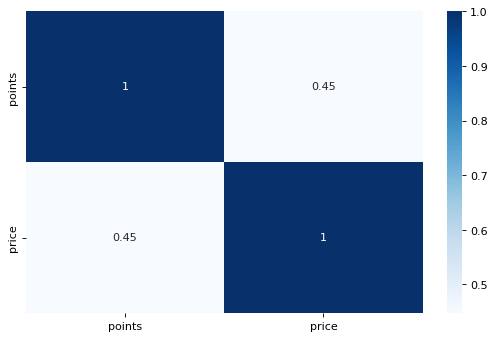

In [ ]:
plt.figure( figsize=( 8,5 ), dpi=80 )
sns.heatmap(wine.corr(), cmap='Blues', annot=True )
plt.show()

Temos uma relação boa entre os dois, com as demais variáveis teremos uma predição boa acredito.

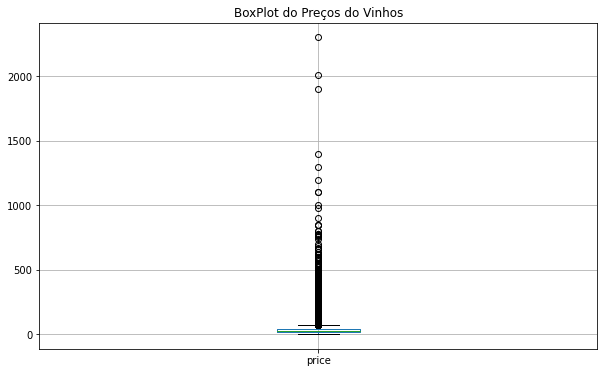

In [ ]:
plt.figure(figsize=(10,6))
wine.boxplot(['price']); plt.title('BoxPlot do Preços do Vinhos')
plt.show()

Podemos ver que temos outliers, valores bem discrepantes, iremos analisar a real necessidade de excluir estes, acima de 1500 talvez.

In [ ]:
wine[wine.price > 1500]

,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
13318,Wine 13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34920,Wine 34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,Wine 34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux


In [ ]:
trabalhando_dados('province')

province: 
['California' 'Northern Spain' 'Oregon' 'Provence' 'Northeastern Italy'
 'Southwest France' 'Kumeu' 'Washington' 'Bulgaria' 'Tuscany'
 'France Other' 'Rhône Valley' 'Galicia' 'Andalucia' 'Idaho' 'Burgundy'
 'Loire Valley' 'New York' 'Mendoza Province' 'Victoria' 'Alentejano'
 'Piedmont' 'Alentejo' 'Champagne' 'Upper Galilee' 'Beira Atlantico'
 'Veneto' 'Douro' 'Tejo' 'Stellenbosch' 'Levante' 'Sicily & Sardinia'
 'Southern Italy' 'Languedoc-Roussillon' 'Bordeaux' 'Atalanti Valley'
 'Catalonia' 'Santorini' 'Florina' 'Marchigue' 'Colchagua Valley'
 'Curicó Valley' 'Nemea' 'Maule Valley' 'Alsace' 'Guerrouane'
 'Colinele Dobrogei' 'Central Spain' 'Vinho Verde' 'Mosel' 'Rheinhessen'
 'Golan Heights' 'Württemberg' 'Ahr' 'British Columbia' 'Moldova'
 'Spain Other' 'Sopron' 'Other' 'Walker Bay' 'Dão' 'Italy Other'
 'Duriense' 'Ontario' 'Beiras' 'Tokaji' 'Lisboa' 'Thermenregion'
 'Burgenland' 'Carnuntum' 'Rheingau' 'Nahe' 'South Australia'
 'North Dalmatia' 'Thracian Valley' 'Goriska 

,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery


Muito bom, após as exclusões que fizemos, a coluna provincia ficou sem valores nulos. Isso é muito bom para quaisquer predições que iremos fazer futuramente.

Vou deixar para olhar as variaveis 'region_1' e 'region_2' por último, estas tem muitos valores nulos, teremos que olhar com mais atenção para ver como tratá-las

In [ ]:
trabalhando_dados('variety')

variety: 
['Cabernet Sauvignon' 'Tinta de Toro' 'Sauvignon Blanc' 'Pinot Noir'
 'Provence red blend' 'Friulano' 'Tannat' 'Chardonnay' 'Tempranillo'
 'Malbec' 'Rosé' 'Tempranillo Blend' 'Syrah' 'Mavrud' 'Sangiovese'
 'Sparkling Blend' 'Rhône-style White Blend' 'Red Blend' 'Mencía'
 'Palomino' 'Petite Sirah' 'Riesling' 'Cabernet Sauvignon-Syrah'
 'Portuguese Red' 'Nebbiolo' 'Pinot Gris' 'Meritage' 'Baga' 'Glera'
 'Malbec-Merlot' 'Merlot-Malbec' 'Ugni Blanc-Colombard' 'Viognier'
 'Cabernet Sauvignon-Cabernet Franc' 'Moscato' 'Pinot Grigio'
 'Cabernet Franc' 'White Blend' 'Monastrell' 'Gamay' 'Zinfandel' 'Greco'
 'Barbera' 'Grenache' 'Rhône-style Red Blend' 'Albariño' 'Malvasia Bianca'
 'Assyrtiko' 'Malagouzia' 'Carmenère' 'Bordeaux-style Red Blend'
 'Touriga Nacional' 'Agiorgitiko' 'Picpoul' 'Godello' 'Gewürztraminer'
 'Merlot' 'Syrah-Grenache' 'G-S-M' 'Mourvèdre'
 'Bordeaux-style White Blend' 'Petit Verdot' 'Muscat'
 'Chenin Blanc-Chardonnay' 'Cabernet Sauvignon-Merlot' 'Pinot Bianco'
 '

,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery


In [ ]:
trabalhando_dados('winery')

winery: 
['Heitz' 'Bodega Carmen Rodríguez' 'Macauley' ... 'Screwed' 'Red Bucket'
 'White Knot']
count               97818
unique              14808
top       Williams Selyem
freq                  235
Name: winery, dtype: object


,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery


As variáveis variety e winery estão sem valores nulos e também nos ajudarão nas recomendações.

In [ ]:
trabalhando_dados('region_1')

region_1: 
['Napa Valley' 'Toro' 'Knights Valley' ... 'Listrac' 'St.-Amour'
 'Coteaux du Tricastin']
count           81895
unique           1236
top       Napa Valley
freq             4128
Name: region_1, dtype: object


,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
25,Wine 25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
30,Wine 30,Bulgaria,This Bulgarian Mavrud presents the nose with s...,Bergulé,90,15.0,Bulgaria,NaN,NaN,Mavrud,Villa Melnik
42,Wine 42,US,This is an aromatic brooder with aromas of sco...,Private Reserve,90,55.0,Idaho,NaN,NaN,Petite Sirah,Huston
64,Wine 64,Portugal,"This is a super-ripe, still very young wine. I...",NaN,91,23.0,Alentejano,NaN,NaN,Portuguese Red,Herdade do Rocim
74,Wine 74,Portugal,It is the ripe dark Alicante Bouschet that dom...,Premium,91,15.0,Alentejo,NaN,NaN,Portuguese Red,Adega Cooperativa de Borba
...,...,...,...,...,...,...,...,...,...,...,...
149610,Wine 149610,Portugal,A sadly unbalanced wine from a company that ha...,10-year old tawny,84,NaN,Port,NaN,NaN,Port,Ferreira
149619,Wine 149619,Portugal,This is more like an Italian bitters than a Po...,30-year old tawny,84,60.0,Port,NaN,NaN,Port,Messias
149624,Wine 149624,Portugal,"An easy, fresh, ripe style, with dried fruits ...",Presidential 20-year old tawny,84,50.0,Port,NaN,NaN,Port,C. da Silva
149631,Wine 149631,Portugal,"This is a very old 40-year old, with some hars...",40-year old tawny,84,130.0,Port,NaN,NaN,Port,Poças


'region_1' vou testar mais pra frente excluíndo os valores nulos ou sem a coluna inteira.

In [ ]:
trabalhando_dados('region_2')

region_2: 
['Napa' nan 'Sonoma' 'Willamette Valley' 'Central Coast' 'Columbia Valley'
 'Finger Lakes' 'California Other' 'Mendocino/Lake Counties' 'South Coast'
 'Central Valley' 'New York Other' 'Sierra Foothills' 'Southern Oregon'
 'Oregon Other' 'Napa-Sonoma' 'North Coast' 'Washington Other'
 'Long Island']
count             39478
unique               18
top       Central Coast
freq               8375
Name: region_2, dtype: object


,wine number,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,Wine 1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
4,Wine 4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Wine 5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Wine 6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Wine 7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
...,...,...,...,...,...,...,...,...,...,...,...
149632,Wine 149632,Australia,Nut and white stone fruit aromas start things ...,NaN,84,12.0,South Australia,McLaren Vale,NaN,Chardonnay,White Knot
149634,Wine 149634,France,Atypically light in body and reticent on the n...,NaN,84,15.0,Alsace,Alsace,NaN,Gewürztraminer,W. Gisselbrecht
149636,Wine 149636,Portugal,Oreo eaters will enjoy the aromas of this wine...,30-year old tawny,84,NaN,Port,NaN,NaN,Port,Casa Santa Eufemia
149638,Wine 149638,Argentina,"Heavy and basic, with melon and pineapple arom...",NaN,84,9.0,Mendoza Province,Uco Valley,NaN,Sauvignon Blanc,Finca El Portillo


'region_2' vou excluir a coluna inteira já de cara, são muitos valores nulos, e as regiões se repetem muito.

In [ ]:
wine = wine.drop(columns='region_2')

In [ ]:
wine.head()

,wine number,country,description,designation,points,price,province,region_1,variety,winery
0,Wine 0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Wine 1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,Wine 2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,Wine 3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,Wine 4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [ ]:
wine = wine.reset_index()
wine = wine.drop(columns='index')

##Predição preços
Agora iremos começar a etapa de prever os valores faltantes para a coluna preços.

Queria utilizar o código abaixo, porém não foi possível devido a falta de memória, ficará para testes futuros, vamos utilizar o código seguinte, com menos variáveis.

In [ ]:
# wine_price = wine.drop(columns=['description','designation','region_1'])
# wine_price = pd.get_dummies(wine_price, columns=['country','province','variety','winery'])

In [ ]:
wine_price = wine.drop(columns=['wine number','description','designation','region_1','winery'])
wine_price = pd.get_dummies(wine_price, columns=['country','province','variety'])

In [ ]:
wine_price.shape

(97818, 1137)

In [ ]:
wine_price.shape

(97818, 1137)

Vamos separar o dataset, um com os valores nulos da coluna preços, que será para fazer o treino e o testo do modelo. O outro será com os valores nulos da coluna preço, para poder predizer estes após a criação do modelo.

In [ ]:
#dataset com os valores não nulos da coluna preço
wine_price_nonull =  wine_price.dropna(axis=0)

In [ ]:
wine_price_nonull = wine_price_nonull.reset_index()
wine_price_nonull = wine_price_nonull.drop(columns='index')

In [ ]:
#dataset com os valores nulos da coluna preço
wine_price_isnull = wine_price[wine_price['price'].isnull()]

In [ ]:
wine_price_isnull = wine_price_isnull.reset_index()
wine_price_isnull = wine_price_isnull.drop(columns='index')

In [ ]:
X_nonull = wine_price_nonull.drop(columns='price')
y_nonull = wine_price_nonull.price

In [ ]:
X_nonull.head(5)

,points,country_Albania,country_Argentina,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_Chile,...,variety_Xynisteri,variety_Yapincak,variety_Zelen,variety_Zibibbo,variety_Zierfandler,variety_Zierfandler-Rotgipfler,variety_Zinfandel,variety_Zlahtina,variety_Zweigelt,variety_Žilavka
0,96,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,96,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,96,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_isnull = wine_price_isnull.drop(columns='price')
y_isnull = wine_price_isnull.price

In [ ]:
X_isnull.head(2)

,points,country_Albania,country_Argentina,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_Chile,...,variety_Xynisteri,variety_Yapincak,variety_Zelen,variety_Zibibbo,variety_Zierfandler,variety_Zierfandler-Rotgipfler,variety_Zinfandel,variety_Zlahtina,variety_Zweigelt,variety_Žilavka
0,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Agora vamos nomalizar os valores e dividir o dataset em treino e teste

In [ ]:
X_std = StandardScaler().fit_transform(X_nonull)
X_train, X_test, y_train, y_test = train_test_split(X_std, y_nonull, test_size = 0.2,random_state=10) 



Aplicando os modelos

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R² =',round(r2_score(y_test, y_pred),4))
print('MAE_erro =', round(mae(y_test, y_pred),4))

R² = -2.0446989322582787e+28
MAE_erro = 197535679846061.56


In [ ]:
rd = Ridge()
rd.fit(X_train, y_train)
y_pred = rd.predict(X_test)
print('R² =',round(r2_score(y_test, y_pred),4))
print('MAE_erro =', round(mae(y_test, y_pred),4))

R² = 0.2522
MAE_erro = 15.4753


In [ ]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print('R² =',round(r2_score(y_test, y_pred),4))
print('MAE_erro =', round(mae(y_test, y_pred),4))

R² = 0.4331
MAE_erro = 12.7551


Os resultados não foram os melhores, porém como esse trabalho o objetivo é a recomendação, não vamos aprofundar aqui para melhorar estas métricas, fica como um trabalho futuro.

Com o melhor resultado que tivemos, vamos predizer os preços nulos que temos no nosso dataset.

In [ ]:
#normalizando os dados para ter um predição melhor
X_std = StandardScaler().fit_transform(X_isnull)

In [ ]:
y_isnull = dtree.predict(X_std)

Aqui então temos os novos valores da coluna preço, o qual substituiremos lá no nosso dataset original no lugar dos valores nulos

In [ ]:
y_isnull

array([43.52272727, 24.21212121, 57.10526316, ..., 34.85714286,
       56.3       , 56.3       ])

Com a predição dos valores nulos em nosso dataset, agora vamos jogar eles para o nosso dataset original, para continuar com o trabalho de recomendações.

In [ ]:
index_isnull = wine[wine['price'].isnull()]['price'].index

In [ ]:
n=0
for i in range(len(wine)):
  if i == index_isnull[n]:
    # print(i)
    wine['price'][i] = y_isnull[n] 
    # print(wine['price'][n])
    # print(n)
    n = n+1
    if n == len(index_isnull):
      break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
trabalhando_dados('price')

price: 
[235.         110.          90.         ...  24.38888889  41.88235294
  16.8       ]
count    97818.000000
mean        33.440665
std         36.546720
min          4.000000
25%         16.000000
50%         25.000000
75%         40.000000
max       2300.000000
Name: price, dtype: float64


,wine number,country,description,designation,points,price,province,region_1,variety,winery


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97818 entries, 0 to 97817
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wine number  97818 non-null  object 
 1   country      97818 non-null  object 
 2   description  97818 non-null  object 
 3   designation  67933 non-null  object 
 4   points       97818 non-null  int64  
 5   price        97818 non-null  float64
 6   province     97818 non-null  object 
 7   region_1     81895 non-null  object 
 8   variety      97818 non-null  object 
 9   winery       97818 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.5+ MB


Como podemos ver, não temos mais valores nulos na nossa variável 'price'

#TESTANDO

In [ ]:
wine.head()

,wine number,country,description,designation,points,price,province,region_1,variety,winery
0,Wine 0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Wine 1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,Wine 2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,Wine 3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,Wine 4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [ ]:
wine_teste = wine.dropna(axis=0).reset_index()
wine_teste = wine_teste.drop(columns='index')

In [ ]:
wine_teste_description = wine_teste[['country','description','designation','province','region_1','variety','winery']].agg(' '.join, axis=1)

#2. Sistema de recomendação: 
faça a construção de seu sistema de recomendação (3 pontos)

Vou usar a técnica NLP: NLTK e Regex para tranformar a coluna description

In [ ]:
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
mlb = MultiLabelBinarizer()
vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))
Tvectorizer = TfidfVectorizer()
tfidf_transformer = TfidfTransformer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#downloads necessários para rodar o código abaixo
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

##Filtrando
Filtrar qual vinho o cliente deseja usar como referência, vamos usar algumas opções.

In [ ]:
wine.head(2)

,wine number,country,description,designation,points,price,province,region_1,variety,winery
0,Wine 0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Wine 1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez


In [ ]:
#Lista de tipos de uvas
wine['variety'].unique()

array(['Cabernet Sauvignon', 'Tinta de Toro', 'Sauvignon Blanc',
       'Pinot Noir', 'Provence red blend', 'Friulano', 'Tannat',
       'Chardonnay', 'Tempranillo', 'Malbec', 'Rosé', 'Tempranillo Blend',
       'Syrah', 'Mavrud', 'Sangiovese', 'Sparkling Blend',
       'Rhône-style White Blend', 'Red Blend', 'Mencía', 'Palomino',
       'Petite Sirah', 'Riesling', 'Cabernet Sauvignon-Syrah',
       'Portuguese Red', 'Nebbiolo', 'Pinot Gris', 'Meritage', 'Baga',
       'Glera', 'Malbec-Merlot', 'Merlot-Malbec', 'Ugni Blanc-Colombard',
       'Viognier', 'Cabernet Sauvignon-Cabernet Franc', 'Moscato',
       'Pinot Grigio', 'Cabernet Franc', 'White Blend', 'Monastrell',
       'Gamay', 'Zinfandel', 'Greco', 'Barbera', 'Grenache',
       'Rhône-style Red Blend', 'Albariño', 'Malvasia Bianca',
       'Assyrtiko', 'Malagouzia', 'Carmenère', 'Bordeaux-style Red Blend',
       'Touriga Nacional', 'Agiorgitiko', 'Picpoul', 'Godello',
       'Gewürztraminer', 'Merlot', 'Syrah-Grenache', 'G-S-M

Aqui o cliente, se ele quiser filtar o vinho por tipo de uva, ele precisa definir na variável 'tipo' abaixo.

Aqui também poderiamos fazer melhorias, tipo o cliente poderia digitar de qualquer forma, maiuscula, minuscula que o programa entenderia, porem não iremos nos arpofundar aqui também.

In [ ]:
#filtro por tipo de uva
tipo = 'Tinta'
idx_description = []
resultado_pesquisa = {}
for idx in range(len(wine['variety'])):
    hit = re.findall(tipo, wine['variety'][idx])
    if hit:
      idx_description.append(idx)
wine_tipouva = wine.loc[idx_description,:]
wine_tipouva_descricao = wine_tipouva['description']
wine_tipouva = wine_tipouva.reset_index()
wine_tipouva = wine_tipouva.drop(columns='index')
wine_tipouva

,wine number,country,description,designation,points,price,province,region_1,variety,winery
0,Wine 1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
1,Wine 5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Tinta de Toro,Numanthia
2,Wine 6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Tinta de Toro,Maurodos
3,Wine 7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
4,Wine 22,Spain,Tarry blackberry and cheesy oak aromas are app...,Termanthia,95,220.0,Northern Spain,Toro,Tinta de Toro,Numanthia
...,...,...,...,...,...,...,...,...,...,...
158,Wine 143393,Spain,"Lots of early mint and wood, but then it loses...",Crianza,85,15.0,Northern Spain,Toro,Tinta de Toro,Vega Sauco
159,Wine 144024,Spain,"From the start to the end, this heavyweight fr...",Wences Reserva,84,60.0,Northern Spain,Toro,Tinta de Toro,Vega Sauco
160,Wine 144276,Spain,The newest project from Vega Sicilia comes fro...,Vino Tinto,90,50.0,Northern Spain,Toro,Tinta de Toro,Pintia
161,Wine 147278,Spain,"Raisin and liqueur carry the oaked nose, yet t...",Sango,85,55.0,Northern Spain,Toro,Tinta de Toro,Rejadorada


In [ ]:
#Lista de países
wine['country'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India',
       'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

Aqui para caso o cliente queira filtrar por país

In [ ]:
#Filtro por país
tipo = 'Spain'
idx_description = []
for idx in range(len(wine['country'])):
    hit = re.findall(tipo, wine['country'][idx])
    if hit:
      idx_description.append(idx)
wine_pais = wine.loc[idx_description,:]
wine_pais_descricao = wine_pais['description']
wine_pais = wine_pais.reset_index()
wine_pais = wine_pais.drop(columns='index')
wine_pais

,wine number,country,description,designation,points,price,province,region_1,variety,winery
0,Wine 1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
1,Wine 5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Tinta de Toro,Numanthia
2,Wine 6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Tinta de Toro,Maurodos
3,Wine 7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
4,Wine 17,Spain,"Nicely oaked blackberry, licorice, vanilla and...",6 Años Reserva Premium,95,80.0,Northern Spain,Ribera del Duero,Tempranillo,Valduero
...,...,...,...,...,...,...,...,...,...,...
5438,Wine 148035,Spain,"Rusty in color, with nutty, leathery aromas th...",Masia Freyes Collección Especial,81,30.0,Catalonia,Penedès,Merlot,Vallformosa
5439,Wine 148036,Spain,"Jumbled, jammy and disjointed, with a heavy lo...",Reserva,81,20.0,Northern Spain,Toro,Tinta de Toro,Viñalcasta
5440,Wine 148038,Spain,"Balsamic vinegar, burnt coffee and pepper arom...",Tinto Joven,80,11.0,Northern Spain,Cariñena,Red Blend,Señorio de Aylés
5441,Wine 148039,Spain,"Mulchy and earthy from start to finish, with d...",Superior,80,9.0,Levante,Utiel-Requena,Tempranillo,Torre Oria


Poderia criar inúmeros filtros para escolher o vinho referência para depois ser feita a recomendação, mas como já dito, aqui o objetivo é a recomendação em si.

##Preparando os dados para a modelagem

In [ ]:
# funcao para tratar cada palavra e remover stopwords
def processamento(tokens):
    
    token_processado = []
    for token in tokens:
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        
        if token not in stop_words:
            token = stemmer.stem(token)
            token_processado.append(token)
        
    return token_processado

#podemos usar as 3 matrizes abaixo para realizar a recomendação

#description = wine.description  #todo o dataset incluído
# wine_pais_descricao            #filtro feito por país
# wine_tipouva_descricao         #filtro feito pelo tipo da uva


documentos_descrpt = []
for descrpt in wine_teste_description: #wine_teste_description #wine_pais_descricao
    
    # expressao regular para remover pontuacoes do texto
    sinopse = re.sub(r'[^\w\s]','', descrpt)
    tokens = processamento(word_tokenize(descrpt))
    documentos_descrpt.append(' '.join(tokens))



In [ ]:
#vecto = vectorizer
#X_train_counts = vectorizer.fit_transform(documentos_summ)
#Tvecto = Tvectorizer
X_train_Tvc = Tvectorizer.fit_transform(documentos_descrpt)
#X_new = SelectKBest(chi2, k=40000).fit_transform(X_train_counts, y)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_Tvc)

X = X_train_tfidf

In [ ]:
#wine_tipouva
wine_pais

,wine number,country,description,designation,points,price,province,region_1,variety,winery
0,Wine 1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
1,Wine 5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Tinta de Toro,Numanthia
2,Wine 6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Tinta de Toro,Maurodos
3,Wine 7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
4,Wine 17,Spain,"Nicely oaked blackberry, licorice, vanilla and...",6 Años Reserva Premium,95,80.0,Northern Spain,Ribera del Duero,Tempranillo,Valduero
...,...,...,...,...,...,...,...,...,...,...
5438,Wine 148035,Spain,"Rusty in color, with nutty, leathery aromas th...",Masia Freyes Collección Especial,81,30.0,Catalonia,Penedès,Merlot,Vallformosa
5439,Wine 148036,Spain,"Jumbled, jammy and disjointed, with a heavy lo...",Reserva,81,20.0,Northern Spain,Toro,Tinta de Toro,Viñalcasta
5440,Wine 148038,Spain,"Balsamic vinegar, burnt coffee and pepper arom...",Tinto Joven,80,11.0,Northern Spain,Cariñena,Red Blend,Señorio de Aylés
5441,Wine 148039,Spain,"Mulchy and earthy from start to finish, with d...",Superior,80,9.0,Levante,Utiel-Requena,Tempranillo,Torre Oria


##4. Modelagem

In [ ]:
#indice_vinho é o vinho parâmetro
 # K é quantidade de recomendações que quer receber
def recomendacoes(filtro,indice_vinho, X, k ,metrica='cosine', mostrar_distancia=False):
  index = []
  k+=1
  SVM = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metrica)
  SVM.fit(X)
  X_vetor = X[indice_vinho].reshape(1,-1)
  neighbour = SVM.kneighbors(X_vetor, return_distance=mostrar_distancia)
  for i in range(0,k):
      n = neighbour.item(i)
      index.append(n)
  #vizinhos_ids.pop(0)
  vizinhos_ids = filtro.loc[index,['wine number','country','variety','description']]
  return vizinhos_ids

Aqui, para ser feita a recomendação, temos que escolher o índice do vinho o qual queira usar como referência, a matriz do qual o vinho foi escolhido e quantas recomendações o cliente quer

In [ ]:
idx = 8
recomendacoes(wine_teste,idx,X,k=5)  #wine_pais

,wine number,country,variety,description
8,Wine 8,US,Pinot Noir,This re-named vineyard was formerly bottled as...
3729,Wine 6759,US,Chardonnay,High-toned lemon and toasted nut notes mark th...
1227,Wine 2086,US,Viognier,"Lively aromas, an appetizing balance and just-..."
570,Wine 908,France,Rosé,"This lightly wood-aged wine, from an estate th..."
458,Wine 706,US,Cabernet Franc,Plummy chocolate stars in this densely texture...
806,Wine 1361,US,Chardonnay,"Lots of purity, with acidity and stony mineral..."


Aqui temos as recomendações, na primeira posição temos o vinho referência e abaixo todas as 5 recomendações feita pelo código.

#3. Relatório: 
Construa um relatório utilizando o Markdown para escrever. Seja criativo para apresentar seus achados e siga os passos abaixo:(4 pontos) 
- Imagine que você possui uma startup e este é o primeiro relatório apresentará
- Coloque o nome do seu produto
- Apresente a introdução do problema (seja sucinto, escreva com poucas palavras)
- Coloque gráficos e frases para sustentar seus argumentos
- Mostre as soluções do mercado
- Escreva sobre a sua solução e por que ela é a melhor

##Apresentação

##**Carta de Vinhos Alto Vale do Taquari**
**Apresento a vocês a primeira carta de Vinhos com recomendação inteligente**

A ideia deste produto é recomendar vinhos de acordo com o gosto do cliente, se você tem um vinho que gosta muito ou tomou um vinho e gostaria de experientar vinhos parecidos, este produto é ideal para você. 

O cliente pode buscar recomendações com gosto parecido, com tonalidade parecida, com densidade parecida, com a caracteristica que quiser filtrar, depende do gosto do cliente. A ideia é trazer vinhos de todo o mundo para esta carta, onde você, dependendo da região que se encontra, vai pode buscar por vinhos locais ou do outro lado do mundo.

##Produto
Aqui vamos abordar o funcionamento do produto, em qual parte do projeto estamos e onde queremos chegar. O projeto está parcialmente pronto, funcionando, porém com muitas melhorias a serem feitas, para o cliente ter um experiência única e perfeita. Afinal vinho é fino, queremos entregar para o cliênte um produto fino à altura da qualidade dos melhores vinhos que temos em nossa carta.

Para abrir o nosso projeto, vamos olhar para as vinículas que estamos trabalhando até o momento, ver quais tem mais vinhos para nos oferecer.

Text(0.5, 1.0, 'VINÍCULAS COM MAIS VINHOS')

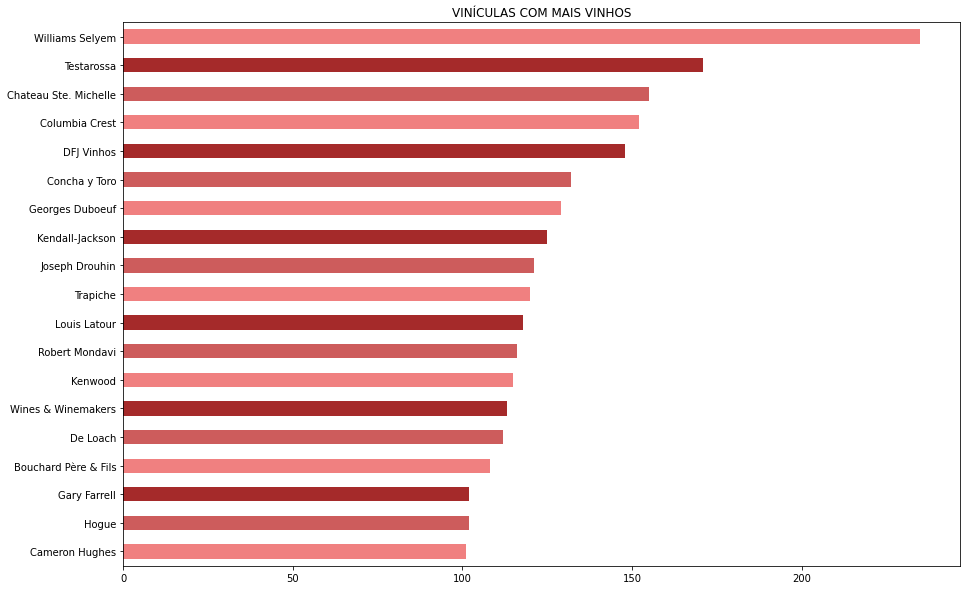

In [ ]:
vinicula = wine['winery'].value_counts(ascending=True)
vinicula = vinicula[vinicula>100]

plt.figure(figsize=(15,10))
vinicula.plot.barh(color=["lightcoral","indianred","brown"])
plt.title('Vinículas com mais vinhos'.upper(), fontsize=12)

Aqui vamos olhar por região/provincia, onde estão os melhores vinhos (por pontuação)

Text(0.5, 1.0, 'PROVINCIAS COM AS MELHORES PONTUAÇÕES')

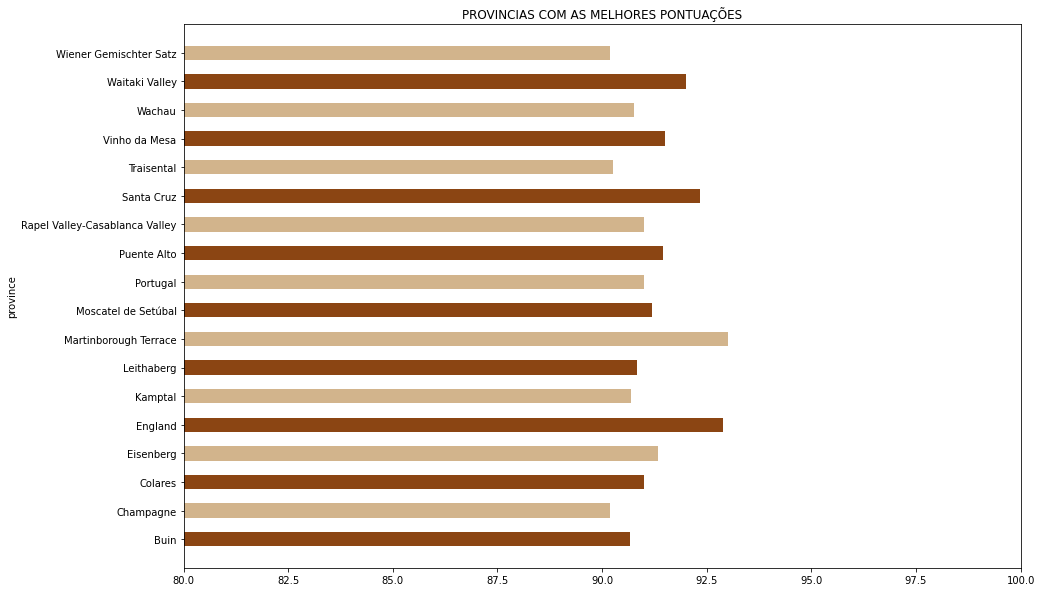

In [ ]:
points_province = wine.groupby('province')['points'].mean()
points_province = points_province[points_province>90]

plt.figure(figsize=(15,10))
points_province.plot.barh(color=["saddlebrown","tan"])
plt.axis([80, 100,-1,len(points_province)])
plt.title('Provincias com as melhores pontuações'.upper(), fontsize=12)

No nosso produto o cliente poderá filtrar as caracteristicas que achar interessante para vizualizar em gráficos, fazer comparações entre os vinhos, regiões, vinículas, isso tudo ficará disponível, são melhorias futuras.

##Diferencial

No mercado podemos encontrar diversas cartas de vinhos, mas todas elas você deverá filtrar por alguma característica, o nosso diferencial é não precisar fazer filtros, apesar de termos essa opção também.

O nosso diferencial é o cliente apenas selecionar o vinho que gosta ou que já experimentou que nosso produto irá recomendar vinhos parecidos, vinhos com a sua cara. O cliente não precisa entender de vinho, ele apenas tem q ter gostado de algum que já terá varias opções para degustar.

##Conclusão

Como já dito anteriomente, temos muitas melhorias a serem feitas, porém esta é apenas a nossa primeira apresentação, no próximo encontra traremos muito mais novidades, muito mais opções de vinhos. 

Teremos a opção de cadastrar o seu vinho favorito e atrávez deste cadastro recomendar outros vinho de características semelhantes, ao gosto do cliente.